In [1]:
from bigtester import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
QuantidadeX = 30
Kx = 30
ITx = 100

In [4]:
A1 = TheBigTester2(QuantidadeX, Kx, ITx, 0.01, 0.03, 1/5, 1/5)
A2 = TheBigTester2(QuantidadeX, Kx, ITx, 0.05, 0.07, 1/5, 1/5)
A3 = TheBigTester2(QuantidadeX, Kx, ITx, 0.10, 0.15, 1/5, 1/5)

B1 = TheBigTester2(QuantidadeX, Kx, ITx, 0.01, 0.03, 1/10, 1/10)
B2 = TheBigTester2(QuantidadeX, Kx, ITx, 0.05, 0.07, 1/10, 1/10)
B3 = TheBigTester2(QuantidadeX, Kx, ITx, 0.10, 0.15, 1/10, 1/10)

C1 = TheBigTester2(QuantidadeX, Kx, ITx, 0.01, 0.03, 1/20, 1/20)
C2 = TheBigTester2(QuantidadeX, Kx, ITx, 0.05, 0.07, 1/20, 1/20)
C3 = TheBigTester2(QuantidadeX, Kx, ITx, 0.10, 0.15, 1/20, 1/20)

D1 = TheBigTester2(QuantidadeX, Kx, ITx, 0.01, 0.03, 1/30, 1/30)
D2 = TheBigTester2(QuantidadeX, Kx, ITx, 0.05, 0.07, 1/30, 1/30)
D3 = TheBigTester2(QuantidadeX, Kx, ITx, 0.10, 0.15, 1/30, 1/30)

E1 = TheBigTester2(QuantidadeX, Kx, ITx, 0.01, 0.03, 1/50, 1/50)
E2 = TheBigTester2(QuantidadeX, Kx, ITx, 0.05, 0.07, 1/50, 1/50)
E3 = TheBigTester2(QuantidadeX, Kx, ITx, 0.10, 0.15, 1/50, 1/50)

F1 = TheBigTester2(QuantidadeX, Kx, ITx, 0.01, 0.03, 1/100, 1/100)
F2 = TheBigTester2(QuantidadeX, Kx, ITx, 0.05, 0.07, 1/100, 1/100)
F3 = TheBigTester2(QuantidadeX, Kx, ITx, 0.10, 0.15, 1/100, 1/100)

Nova Versão 3.1
0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
0.4725873591681868
0.17372536180655532
135.46666666666667
230.86666666666667
231.62383141762453
329.91210727969343
Nova Versão 3.1
0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
0.24701810282642833
0.17272092350456555
258.73333333333335
278.06666666666666
360.5858237547894
373.69455938697314
Nova Versão 3.1
0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
0.3200914157487174
0.22200662464548065
297.1
317.9
387.5707279693487
395.8334099616859
Nova Versão 3.1
0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
0.6038426757142391
0.3079235549627382
78.56666666666666
154.4
156.826360153

In [16]:
for c in range(2,6):
    print(np.mean(C2[:,c]))



117.9
134.63333333333333
200.51578544061297
216.49632183908045


In [26]:
yolo = TheBigTester2(QuantidadeX, Kx, 30, 0.05, 0.05, 1/30, 1/30)

Nova Versão 3.3.1
0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
0.3952877524333986
0.41199416296408364
91.93333333333334
38.93333333333333
186.85517241379313
160.3312643678161


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

# Constants

def MonteCarlo(spread1, spread2, tag):

    DORAND = 5000  # Number of randomisations to perform

    # Load data (replace this with your actual data loading mechanism)
    # Example: spread1 and spread2 are numpy arrays loaded from a file
    # For demonstration, I'll create dummy data
    #spread1 = yolo[:,0]  # Replace with actual data
    #spread2 = yolo[:,1]  # Replace with actual data

    # Compute test statistics (difference between medians and means)
    medianSpreadDiff = np.median(spread2) - np.median(spread1)
    meanSpreadDiff = np.mean(spread2) - np.mean(spread1)

    # Combine data for randomisation
    totalSpread = np.concatenate((spread1, spread2))

    # Perform randomisation test
    randMedianSpreadDiff = np.full(DORAND, np.nan)
    randMeanSpreadDiff = np.full(DORAND, np.nan)

    for randPool in range(DORAND - 1):
        # Generate new spread1 and spread2 through random relabelling
        new1Index = np.random.permutation(60)
        newSpread1 = totalSpread[new1Index[:30]]
        newSpread2 = totalSpread[new1Index[30:60]]
        
        # Find and store difference between medians and means
        randMedianSpreadDiff[randPool] = np.median(newSpread2) - np.median(newSpread1)
        randMeanSpreadDiff[randPool] = np.mean(newSpread2) - np.mean(newSpread1)

    # Include originals as a possible randomisation
    randMedianSpreadDiff[-1] = medianSpreadDiff
    randMeanSpreadDiff[-1] = meanSpreadDiff

    p_value_mean = np.sum(np.abs(randMeanSpreadDiff) >= np.abs(meanSpreadDiff)) / DORAND

    # Calculate p-value for the median difference
    p_value_median = np.sum(np.abs(randMedianSpreadDiff) >= np.abs(medianSpreadDiff)) / DORAND

    # Print results
    print(f"P-value for mean difference: {p_value_mean}")
    print(f"P-value for median difference: {p_value_median}")

    # Interpret results
    if p_value_mean < 0.05:
        if meanSpreadDiff > 0:
            print("spread2 is statistically better than spread1.")
        else:
            print("spread1 is statistically better than spread2.")
    else:
        print("There is no statistically significant difference between spread1 and spread2.")

    # Visualise the results
    plt.figure(figsize=(10, 6))
    plt.hist(randMeanSpreadDiff, bins=100, color=[0.6, 0.6, 0.6], edgecolor=[0.6, 0.6, 0.6])
    plt.axvline(meanSpreadDiff, color='black', linestyle='--', linewidth=2, label='Diferença Observada')
    plt.scatter(meanSpreadDiff, 0, color='black', zorder=5, label='Diferença Observada')
    plt.title(tag, fontsize=14)
    plt.xlabel('Diferença entre as médias populacionais', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

P-value for mean difference: 0.0002
P-value for median difference: 0.0002
spread1 is statistically better than spread2.


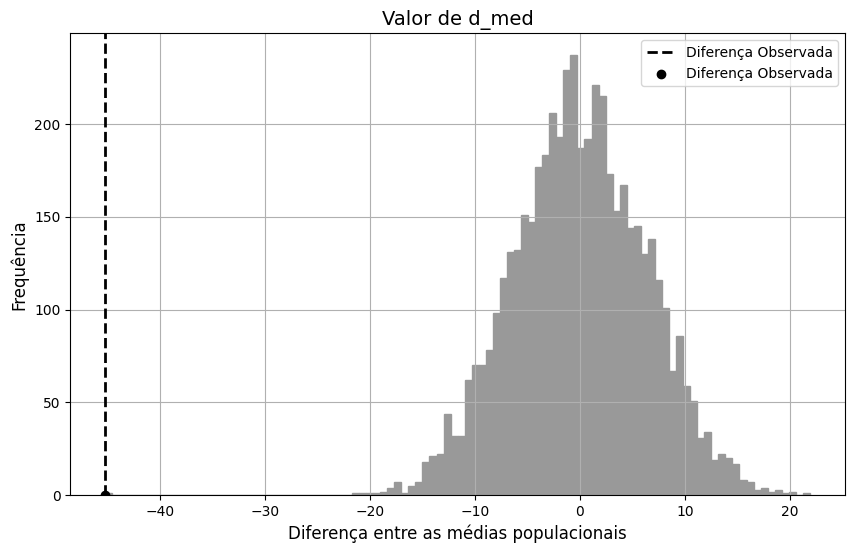

In [57]:
MonteCarlo(yolo2[:,4], yolo2[:,5], 'Valor de d_med')

In [ ]:
yolo1 = TheBigTester2(QuantidadeX, Kx, 100, 0.05, 0.05, 1/30, 1/30)
yolo2 = TheBigTester2(QuantidadeX, Kx, 300, 0.05, 0.05, 1/30, 1/30)

Nova Versão 3.3.1
0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
0.44517529334330896
0.4293447994075402
90.1
31.466666666666665
161.0015325670498
122.09080459770115
Nova Versão 3.3.1
0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
0.41600320125109186
0.40256056428713494
89.53333333333333
31.666666666666668
154.2031417624521
109.01601532567051


:x
0/300
50/300
100/300
150/300
200/300
250/300


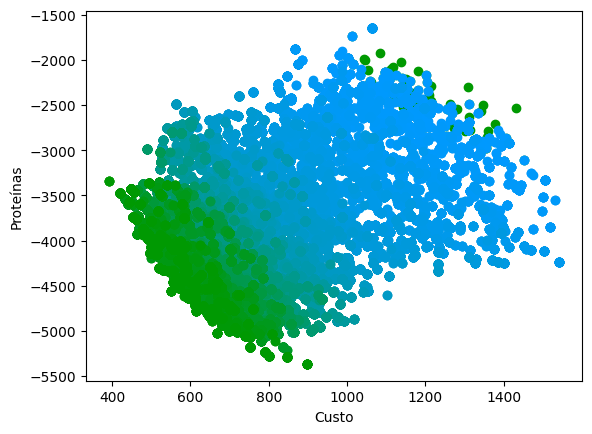

In [73]:
S = NSGAII(100, 300)



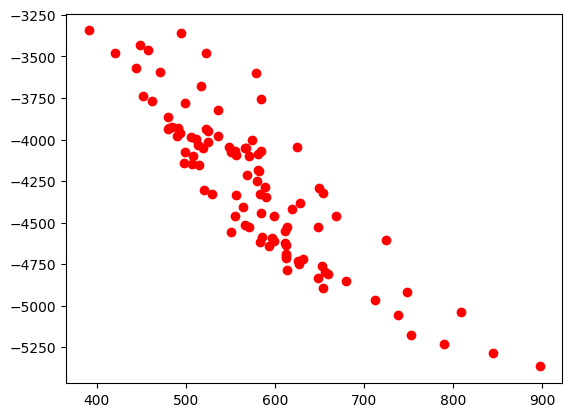

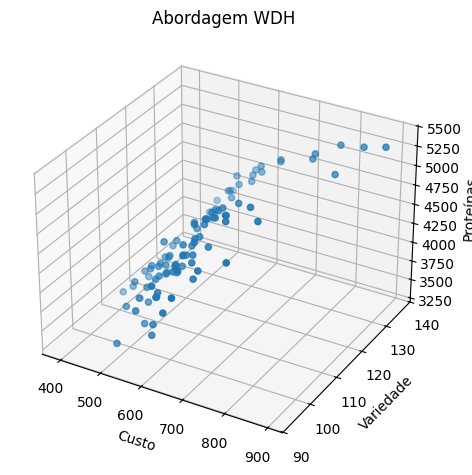

In [74]:
funcOBJ = calculaObjPop(S)
mask = is_pareto_efficient(funcOBJ)
plt.scatter(funcOBJ[mask][:,0],funcOBJ[mask][:,2], color = 'red')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Abordagem WDH")
ax.set_xlabel("Custo")
ax.set_ylabel("Variedade")
ax.set_zlabel("Proteínas")
# Plot the data with customizations
scatter = ax.scatter(funcOBJ[mask][:,0], funcOBJ[mask][:,1], -funcOBJ[mask][:,2])

plt.tight_layout()
plt.show()

0/300
50/300
100/300
150/300
200/300
250/300


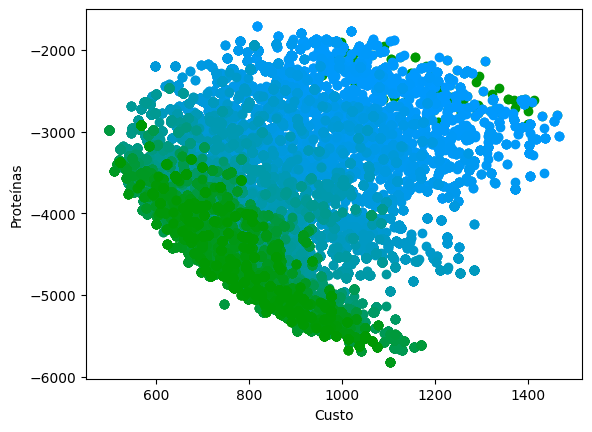

In [75]:
R = iteradorTest(100, 300)


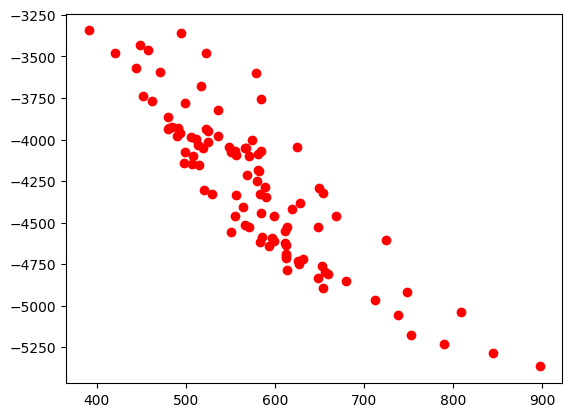

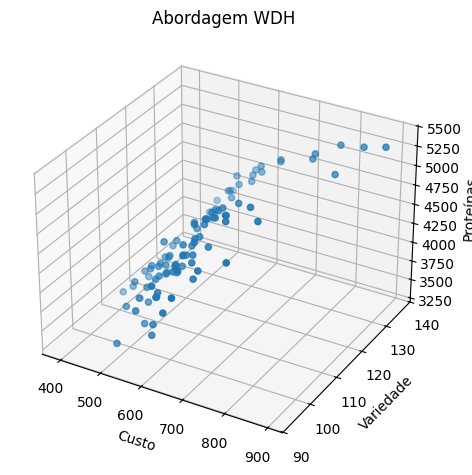

In [76]:
funcOBJ = calculaObjPop(S)
mask = is_pareto_efficient(funcOBJ)
plt.scatter(funcOBJ[mask][:,0],funcOBJ[mask][:,2], color = 'red')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Abordagem WDH")
ax.set_xlabel("Custo")
ax.set_ylabel("Variedade")
ax.set_zlabel("Proteínas")
# Plot the data with customizations
scatter = ax.scatter(funcOBJ[mask][:,0], funcOBJ[mask][:,1], -funcOBJ[mask][:,2])

plt.tight_layout()
plt.show()